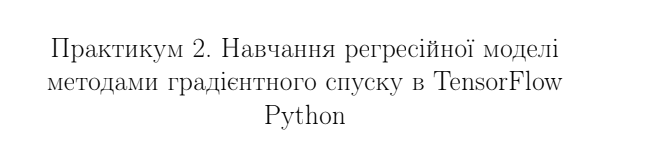
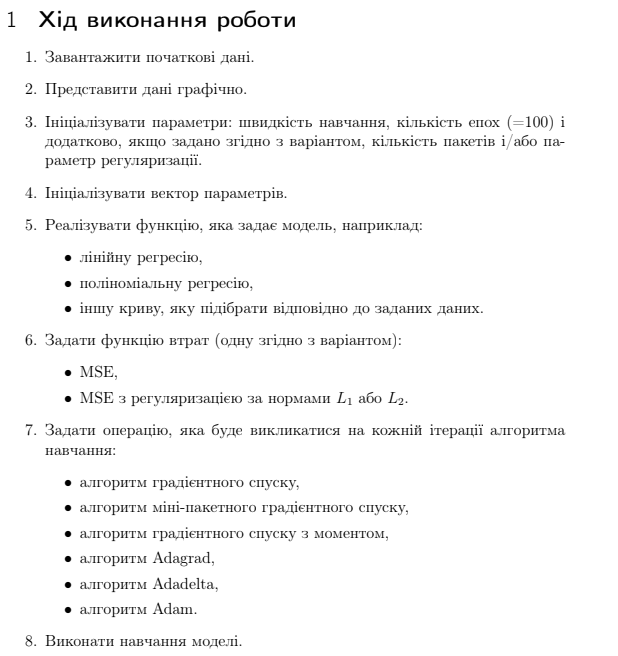
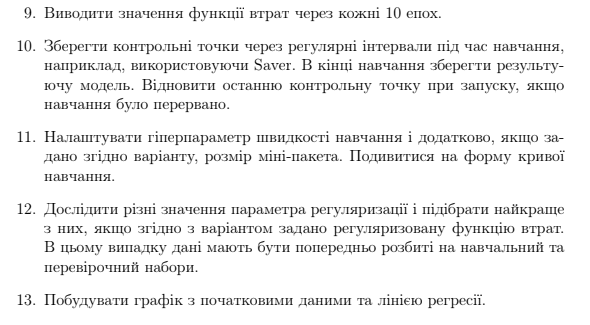
### Варіант 6
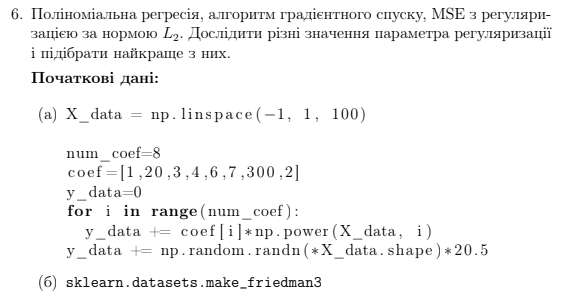

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

Ініціалізуєм перший набор даних

In [95]:
X_data = np.linspace(-1, 1, 100)
num_coef = 8
coef = [1 ,20, 3, 4, 6, 7, 300, 2]
y_data = 0
for i in range(num_coef):
    y_data += coef[i] * np.power(X_data, i)
y_data += np.random.randn(*X_data.shape ) * 20.5

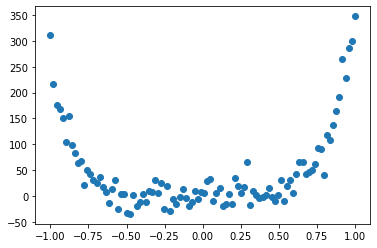

In [96]:
plt.scatter(X_data, y_data)
plt.show()

Нормалізуємо дані

In [97]:
X_scaled = X_data/max(X_data)
y_scaled = y_data/max(y_data)

In [98]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6) 
                                        
X = poly.fit_transform(X_scaled.reshape(-1,1))
print(X.shape)

(100, 7)


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size = 0.1, random_state=1)

Після того як уже підготували усі дані потрібно визначити саму модель. Визначимо за допомогою $keras.Sequential$, який створює нейронну мережу як набір шарів (у випадку нижче 3 шари). Перший шар отримує вхідні дані, останній – вихідні дані.</br>
У першому шару також використувуєму регуляризацію L2. </br>
Виконуємо компіляцію з використанням алгоритмом градієнтного спуску та функцією MSE: 

In [111]:
def model_define(regularizers=0.01, learning_rate=0.01,  input_shape=[1]):
    model = keras.Sequential([
    layers.Dense(36, input_shape=input_shape,
                kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(12),
    layers.Dense(units=1),
    ])

    opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(
        optimizer=opt,
        loss="mse",
    )
    return model

In [112]:
model = model_define(input_shape=[7])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4856
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2872
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2221
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1692
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1552
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1455
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1380
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1327
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1289
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1257
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1234
Epoch 13/100
3/3 [==============================] - 0s 2ms/st

In [119]:
y_pred = model.predict(X) 

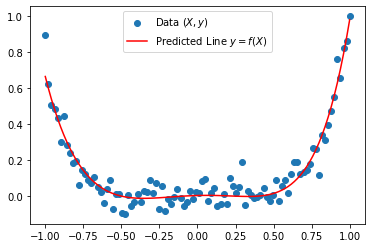

In [122]:
plt.figure()
plt.scatter(X[:,1], y_scaled, label='Data $(X, y)$')
plt.plot(X[:,1], y_pred, color='red', label='Predicted Line $y = f(X)$')
plt.legend()
plt.show()

Як бачимо з графіка то лінія регресії точно описує початкові дані.

In [125]:
regularization = [0.001, 0.01, 0.1, 0.5]
for a in regularization:
    model = model_define(a, 0.01, [7])
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(X_test)
    print('MSE з параметром регуляризації ', a,':', metrics.mean_squared_error(y_test, y_pred))

MSE з параметром регуляризації  0.001 : 0.002859576361602765
MSE з параметром регуляризації  0.01 : 0.002658716328008514
MSE з параметром регуляризації  0.1 : 0.001913166719979811
MSE з параметром регуляризації  0.5 : 0.0033767529617829218


Найкращий результат з параметром регуляризації  0.1

Перейдемо до наступного набору даних

In [127]:
from sklearn.datasets import make_friedman3

X_data, y = make_friedman3(n_samples=1000, random_state=42)

X_df = pd.DataFrame(X_data, columns=['X1', 'X2', 'X3', 'X4'])

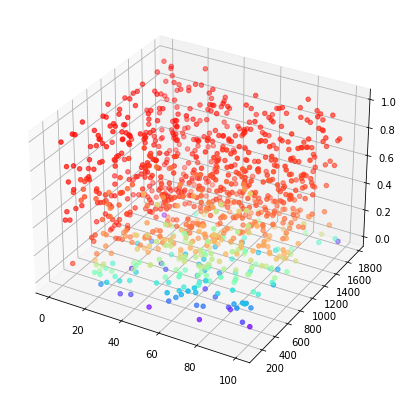

In [128]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_df.iloc[:,0], X_df.iloc[:,1],X_df.iloc[:,2], c=y, cmap=plt.cm.rainbow)
plt.show()

Зоображимо даний датасет у проекції

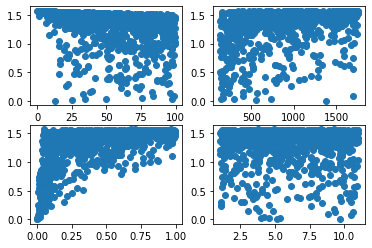

In [129]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_df.iloc[:, 0], y)
ax2.scatter(X_df.iloc[:, 1], y)
ax3.scatter(X_df.iloc[:, 2], y)
ax4.scatter(X_df.iloc[:, 3], y)
plt.show()

In [130]:
print(X_data.shape)

(1000, 4)


Для того щоб продовжити роботу з нашими даними їх потрібно нормалізувати. Тому що моделі легше робити прогнози, якщо точки даних знаходяться в безпосередній близькості одна від одної.

In [131]:
X = (X_df - X_df.min()) / (X_df.max() - X_df.min())

In [132]:
X.head()

,X1,X2,X3,X4
0,0.374676,0.951037,0.732802,0.598235
1,0.155996,0.154378,0.058137,0.866224
2,0.601414,0.707804,0.020596,0.970140
3,0.832908,0.210860,0.182017,0.182251
4,0.304327,0.524040,0.432417,0.290265


Визначимо нову матрицю для того, щоб можна було продовжити обчислення для поліноміальної регресії.

In [149]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4) 
                                        
X_poly = poly.fit_transform(X)
X_poly.shape

(1000, 70)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.1, random_state=1)

In [151]:
model = model_define(0.01, 0.01, [70])
model.fit(X_poly, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 827us/step - loss: 0.6533
Epoch 2/100
32/32 [==============================] - 0s 901us/step - loss: 0.5403
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5152
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5049
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4959
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4876
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4792
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4715
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4638
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4564
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4498
Epoch 13/100
32/32 [=============

Виконаємо передбачення на тестових даних.

In [152]:
y_pred = model.predict(X_poly)

In [153]:
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))

Mean Squared Error: 0.01996810333684414


З отриманих результатів можна сказати, що отримана доволі точна модель.

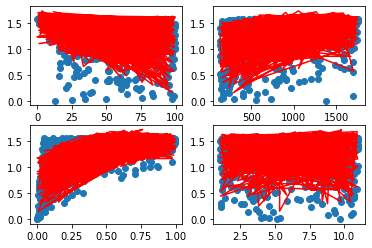

In [156]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_df.iloc[:, 0], y)
ax1.plot(X_df.iloc[:, 0], y_pred, color='red')
ax2.scatter(X_df.iloc[:, 1], y)
ax2.plot(X_df.iloc[:, 1], y_pred, color='red')
ax3.scatter(X_df.iloc[:, 2], y)
ax3.plot(X_df.iloc[:, 2], y_pred, color='red')
ax4.scatter(X_df.iloc[:, 3], y)
ax4.plot(X_df.iloc[:, 3], y_pred, color='red')
plt.show()

Як бачимо з графіка то лінія регресії описує площину на початкових даних там де знаходиться найбільше скупчення.

Проте отримані дані при зображенні графічно не надасть зрозумілої інформації, тому зообразимо наскільки сильно отримані дані відрізняються від істинних.

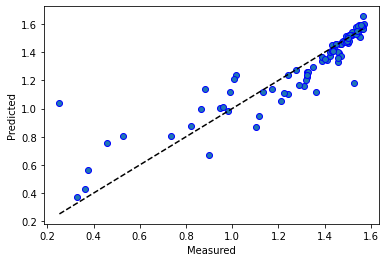

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=('b'))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Отже як бачимо з графіка, то велика кількість передбачених даних знаходиться около лінії і це покахує, що модель здатна більш-менш точно передбачувати дані.

In [94]:
regularization = [0.001, 0.01, 0.1, 0.5]
for a in regularization:
    model = model_define(a, 0.01, [15])
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(X_test)
    print('MSE з параметром регуляризації ', a,':', metrics.mean_squared_error(y_test, y_pred))

MSE з параметром регуляризації  0.001 : 0.018233997728937832
MSE з параметром регуляризації  0.01 : 0.022320417170740434
MSE з параметром регуляризації  0.1 : 0.017845462912152023
MSE з параметром регуляризації  0.5 : 0.02135082473168608


Найкращий результат отримали при параметрі з значенням 0.1

#### Висновок
Під час роботи даної лабораторної роботи було проведено аналіз над двома наборами даних. У першому наборі було визначено лінію регресії, яка описує даний набір. У другому наборі регресія описала площину можливих значень. Також потрібно зазначити, що результат також залежить від значення параметра регуляризацiї. Для першого так і для другогу набору даних найкращий параметр це 0.1.